In [1016]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from random import *

# Potencial Inicial

In [1038]:
"""Condiciones que se pueden manipular en el código"""
v0=int(input("Valor de V_0: "))
N=int(input("Valor de N: "))
M=int(input("Valor de M: "))
dx=int(input("Valor de dx: "))

Valor de V_0: 20
Valor de N: 50
Valor de M: 100
Valor de dx: 1


Definir una matriz con valores aleatorios que representan el potencial

In [1018]:


#Función que genera la matriz del potencial
def fun(N,M):
    V=np.zeros((N,M))
    for j in range (N):
        for i in range(M):
            V[j][i]=randint(-v0,v0)
    return V

Condiciones iniciales

In [1019]:
"""Condiciones iniciales del problema"""

V=fun(N,M)

#y=0
V[0,:]=-v0
#y=b
V[-1,:]=v0
#x=0
V[:,0]=0
#x=a
V[:,-1]=0
V_s=V.copy()

Gráfico de cómo se ve el potencial con sus condiciones iniciales impuestas

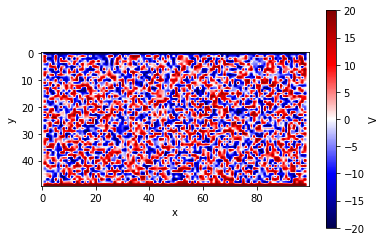

In [1020]:
plt.imshow(V, cmap='seismic')
plt.colorbar(label='V')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Gráfico en 3d de cómo se ve el potencial con sus condiciones iniciales impuestas

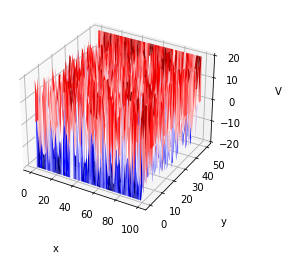

In [1021]:
X, Y= np.meshgrid(np.linspace(0,M,M),np.linspace(0,N,N))

ax= plt.axes(projection='3d')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.plot_surface(X,Y,V, rstride=1, cstride=1, cmap='seismic', edgecolor='none')

Método de relajación con dx=1. Esta forma compila más rápido, sin embargo no se puede escoger el dx=dy

In [1022]:
"""Método de relajación, en donde solo funciona el paso dx=1"""
h=1
for i in range(10**6):
    V_last = V.copy()
    """definición del promedio de los 4 vecinos del potencial"""
    V[1:-1, 1:-1]=0.25*(V[1+h:, 1:-1] + V[:-(1+h), 1:-1] + V[1:-1, 1+h:] + V[1:-1, :-(1+h)])
    if np.max(abs(V-V_last)) < 1e-6:
        print (f"La solución converge en {i+1} pasos.")
        break

else:
    print("La solución falló en converger")

La solución converge en 10091 pasos.


Función del potencial mediante el método de relajación. Esta solución es más lenta que la anterior, sin embargo se puede escoger el dx. La función depende del potencial inicial, el número de iteraciones y del paso dx respectivamente.

In [1023]:
"""Definición del potencial, en donde se puede escoger el dx"""
def potential(V,n_iter,dx):
    lengthx=len(V[0])
    lengthy=len(V)
    for n in range(n_iter):
        for i in range(1, lengthx-dx):
            for j in range(1,lengthy-dx):
                V[j,i]=1/4*(V[j+dx][i] + V[j-dx][i] + V[j][i+dx] + V[j][i-dx])
    return V

In [1024]:
V_s=potential(V_s,1000,1)

# Gráficos

Comportamiento del potencial en función de x y y implementando la primera forma del método de relajación

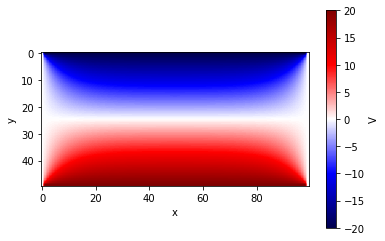

In [1025]:
plt.imshow(V, cmap='seismic')
plt.colorbar(label='V')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


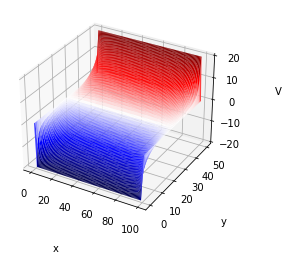

In [1026]:
x,y=np.linspace(0,M,M),np.linspace(0,N,N)
X, Y= np.meshgrid(np.linspace(0,M,M),np.linspace(0,N,N))

ax= plt.axes(projection='3d')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.plot_surface(X,Y,V, rstride=1, cstride=1, cmap='seismic', edgecolor='none')



Comportamiento del potencial en función de x y y implementando la segunda forma del método de relajación

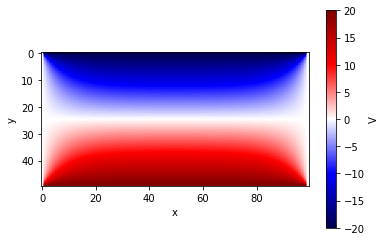

In [1027]:
plt.imshow(V_s, cmap='seismic')
plt.colorbar(label='V')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

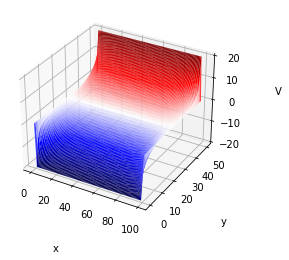

In [1028]:
ax= plt.axes(projection='3d')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.plot_surface(X,Y,V_s, rstride=1, cstride=1, cmap='seismic', edgecolor='none')

# Potencial analítico

In [1029]:
z=np.zeros((N,M))

Se define la función que utiliza la fórmula analítica hallada en el informe

In [1030]:
"""Definición de la fórmula teórica en una matriz de NxM dimensiones"""
def teorica(x,y):
    
    Z=np.zeros((N,M))
    b=4*v0/np.pi
    for n in range(200):
        
        if n%2!=0:
            Z+=b/n*(1/(np.sinh(n*np.pi*N/M)))*np.sin(n*np.pi*x/M)*((np.sinh(n*np.pi*(y)/M))-(np.sinh(n*np.pi*(N-y)/M)))
    
    return Z

In [1031]:
z=teorica(X,Y)

# Gráficos de la función analítica

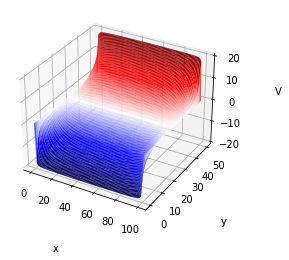

In [1032]:
ax= plt.axes(projection='3d')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.plot_surface(X,Y,z, rstride=1, cstride=1, cmap='seismic', edgecolor='none')

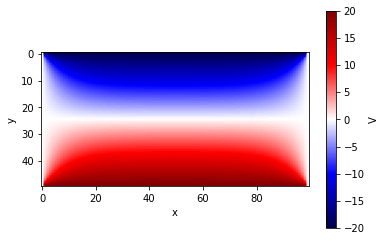

In [1033]:
plt.imshow(z, cmap='seismic')
plt.colorbar(label='V')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cálculo del error del potencial numérico contra el potencial analítico

In [1034]:
error=np.abs(V_s-z)

In [1035]:
h=error/z

C:\Users\augus\AppData\Local\Temp\ipykernel_30920\3410844279.py:1: RuntimeWarning: invalid value encountered in true_divide
  h=error/z


# Gráficos donde se muestra el error entre los dos potenciales

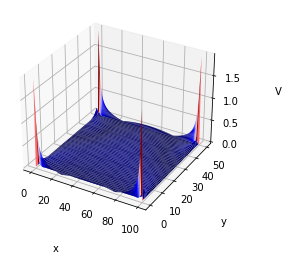

In [1036]:
ax= plt.axes(projection='3d')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.plot_surface(X,Y,error, rstride=1, cstride=1, cmap='seismic', edgecolor='none')

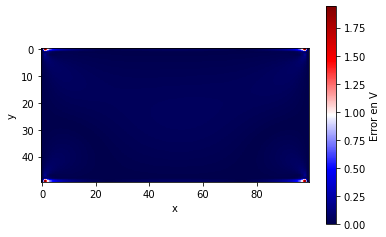

In [1037]:
plt.imshow(error, cmap='seismic')
plt.colorbar(label='Error en V')
plt.xlabel('x')
plt.ylabel('y')
plt.show()